# Scrape the [justETF Screener](https://www.justetf.com/en/find-etf.html)

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import justetf_scraping

C:\Users\Alberto Gerri\AppData\Local\Temp\ipykernel_12912\1335827512.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", None)

<a id="load"></a>
## Load the data

In [3]:
etf_df = justetf_scraping.load_overview(enrich=True)

C:\Users\Alberto Gerri\Documents\00_ex_Onedrive_Poli\coding\justetf-scraping-1\justetf_scraping\overview.py:426: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[column] = df[column].replace({"Yes": True, "No": False}).astype("bool")
C:\Users\Alberto Gerri\Documents\00_ex_Onedrive_Poli\coding\justetf-scraping-1\justetf_scraping\overview.py:426: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[column] = df[column].replace({"Yes": True, "No": False}).astype("bool")


In [4]:
etf_df.head(3)

,wkn,ticker,valor,name,index,inception_date,age_in_days,age_in_years,strategy,domicile_country,currency,hedged,securities_lending,dividends,ter,replication,size,is_sustainable,number_of_holdings,yesterday,last_week,last_month,last_three_months,last_six_months,last_year,last_three_years,last_five_years,2023,2022,2021,2020,last_dividends,last_year_dividends,last_year_volatility,last_three_years_volatility,last_five_years_volatility,last_year_return_per_risk,last_three_years_return_per_risk,last_five_years_return_per_risk,max_drawdown,last_year_max_drawdown,last_three_years_max_drawdown,last_five_years_max_drawdown,asset,instrument,region,exchange
isin,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
GB00BM9JYH62,A3GZKD,AVMX,<NA>,Global X Aave ETP,Aave,2023-03-13,348,0.953425,Long-only,Jersey,USD,False,False,Accumulating,0.99,Physically backed,0,False,<NA>,-15.52,0.98,9.53,-2.08,67.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-40.18,NaN,NaN,NaN,,,,
IE000GGQK173,A3D4VW,R8T,125589092,abrdn Global Real Estate Active Thematics UCITS ETF USD Accumulating ETF,abrdn Global Real Estate Active Thematics,2023-02-22,367,1.005479,"Long-only, Active",Ireland,USD,False,False,Accumulating,0.40,Full replication,10,True,<NA>,-1.71,0.33,0.88,7.85,6.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-15.23,NaN,NaN,NaN,,,,
IE00B0M62Y33,A0HGWF,IUSJ,2308837,iShares AEX UCITS ETF,AEX®,2005-11-18,6672,18.279452,Long-only,Ireland,EUR,False,True,Distributing,0.30,Full replication,624,False,25,8.84,-0.34,8.73,12.31,16.04,15.59,36.88,75.61,16.77,-11.78,29.89,5.14,1.95,2.2,12.02,16.22,18.52,1.3,0.68,0.64,-62.93,-9.52,-22.39,-35.73,,,,


<a id="save"></a>
## Save the data

In [5]:
etf_df.to_csv("justetf.csv", index=True)

<a id="visualize"></a>
## Visualize the data

<Axes: xlabel='Count', ylabel='strategy'>

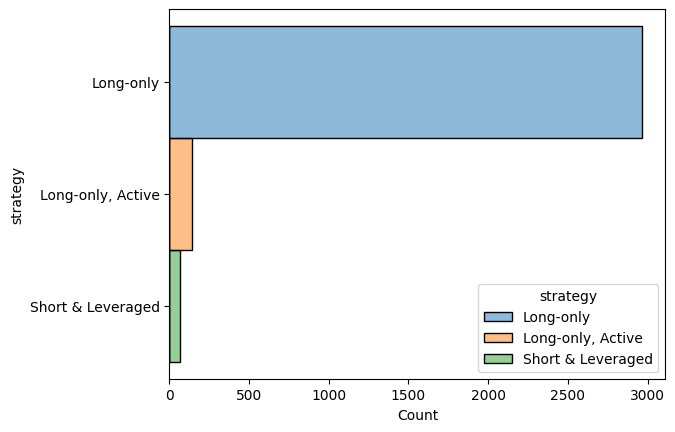

In [6]:
sns.histplot(etf_df, y="strategy", hue="strategy", discrete=True)

<Axes: xlabel='Count', ylabel='instrument'>

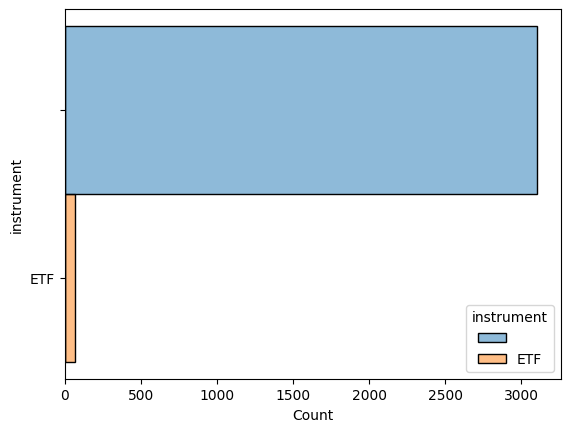

In [7]:
sns.histplot(etf_df, y="instrument", hue="instrument", discrete=True)

<Axes: xlabel='Count', ylabel='asset'>

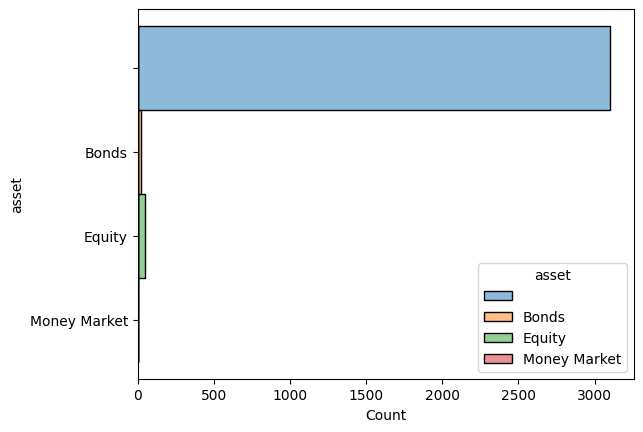

In [8]:
sns.histplot(etf_df, y="asset", hue="asset", discrete=True)

<Axes: xlabel='Count', ylabel='region'>

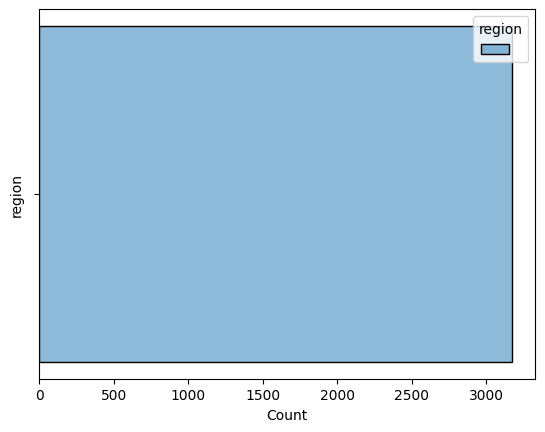

In [9]:
sns.histplot(etf_df, y="region", hue="region", discrete=True)

<Axes: xlabel='Count', ylabel='currency'>

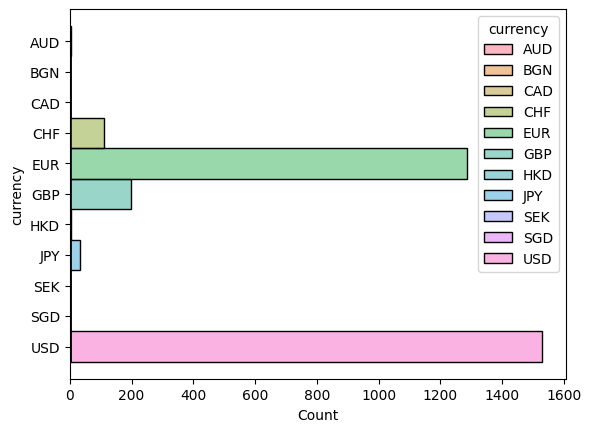

In [10]:
sns.histplot(etf_df, y="currency", hue="currency", discrete=True)

<Axes: xlabel='age_in_years', ylabel='size'>

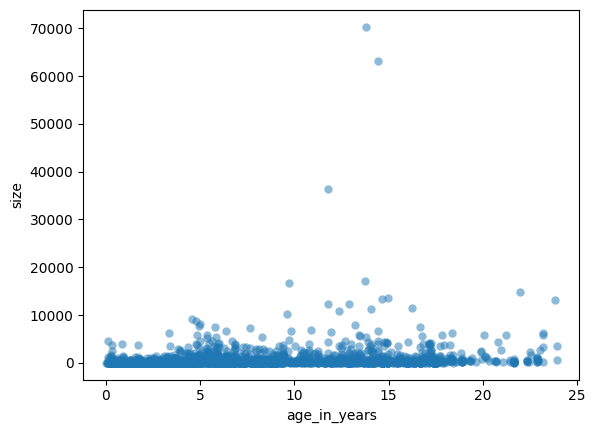

In [11]:
sns.scatterplot(data=etf_df, x="age_in_years", y="size", alpha=0.5, linewidth=0)

The most frequent indices.

In [12]:
index_counts = etf_df["index"].value_counts()

<Axes: xlabel='Count', ylabel='index'>

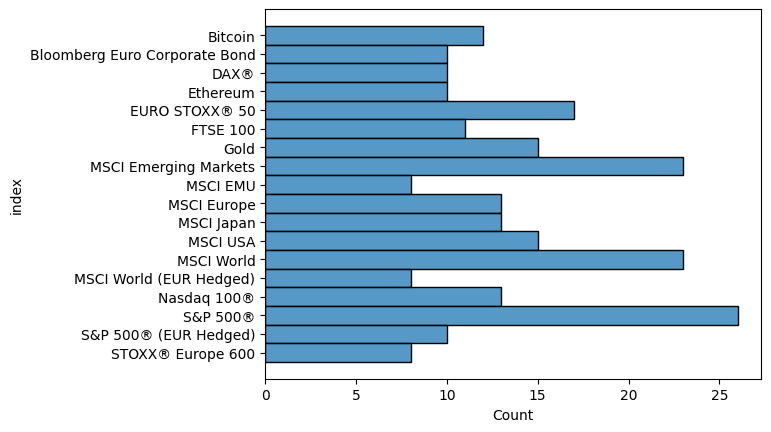

In [13]:
sns.histplot(
    etf_df[etf_df["index"].isin(index_counts[index_counts > 7].index)],
    y="index",
    discrete=True,
)

<a id="search"></a>
## Search over the data

Compare accumulating MSCI World ETFs older than 2 years with fond size greater than € 50M.

In [14]:
acc_msci_world_df = etf_df[
    (etf_df["index"] == "MSCI World")
    & (etf_df["dividends"] == "Accumulating")
    & (etf_df["age_in_years"] > 2)
    & (etf_df["size"] > 50)
]

In [15]:
acc_msci_world_df.shape

(9, 47)

In [16]:
acc_msci_world_df

,wkn,ticker,valor,name,index,inception_date,age_in_days,age_in_years,strategy,domicile_country,currency,hedged,securities_lending,dividends,ter,replication,size,is_sustainable,number_of_holdings,yesterday,last_week,last_month,last_three_months,last_six_months,last_year,last_three_years,last_five_years,2023,2022,2021,2020,last_dividends,last_year_dividends,last_year_volatility,last_three_years_volatility,last_five_years_volatility,last_year_return_per_risk,last_three_years_return_per_risk,last_five_years_return_per_risk,max_drawdown,last_year_max_drawdown,last_three_years_max_drawdown,last_five_years_max_drawdown,asset,instrument,region,exchange
isin,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
FR0014003IY1,LYX9ZB,WLDC,<NA>,Amundi MSCI World II UCITS ETF Acc,MSCI World,2021-06-02,997,2.731507,Long-only,France,EUR,False,False,Accumulating,0.30,Swap based Unfunded,67,False,<NA>,5.72,-0.54,3.85,10.69,14.11,20.15,NaN,NaN,19.77,-12.72,NaN,NaN,NaN,NaN,10.46,NaN,NaN,1.93,NaN,NaN,-16.74,-7.49,NaN,NaN,,,,
LU1681043599,A2H59Q,AMEW,38784696,Amundi MSCI World UCITS ETF EUR (C),MSCI World,2018-04-18,2138,5.857534,Long-only,Luxembourg,EUR,False,False,Accumulating,0.38,Swap based Unfunded,3129,False,<NA>,7.67,1.17,4.82,12.14,14.59,21.24,40.46,80.91,19.46,-12.87,30.94,6.26,NaN,NaN,10.46,14.03,17.38,2.03,0.85,0.72,-33.77,-7.54,-16.89,-33.77,,,,
LU1681043672,A2H59R,XAMZ,38784715,Amundi MSCI World UCITS ETF USD (C),MSCI World,2018-04-18,2138,5.857534,Long-only,Luxembourg,USD,False,False,Accumulating,0.38,Swap based Unfunded,67,False,<NA>,7.71,1.14,5.21,12.04,14.16,21.46,40.28,80.69,19.35,-13.17,31.85,6.04,NaN,NaN,11.33,15.21,18.15,1.89,0.79,0.69,-33.87,-6.64,-17.02,-33.87,,,,
LU1781541179,LYX0YD,LCUW,40587053,Amundi MSCI World V UCITS ETF Acc,MSCI World,2018-02-28,2187,5.991781,Long-only,Luxembourg,USD,False,True,Accumulating,0.12,Full replication,4075,False,1470,7.76,1.13,5.23,12.11,14.26,21.68,40.58,81.42,19.50,-13.19,31.96,6.12,NaN,NaN,11.20,16.24,18.70,1.94,0.74,0.68,-33.91,-6.72,-17.13,-33.91,,,,
IE00B60SX394,A0RGCS,SC0J,10128224,Invesco MSCI World UCITS ETF Acc,MSCI World,2009-04-02,5441,14.906849,Long-only,Ireland,USD,False,False,Accumulating,0.19,Swap based Unfunded,4194,False,<NA>,7.61,1.02,5.12,12.12,14.14,21.61,41.11,82.78,19.66,-12.96,32.12,6.28,NaN,NaN,11.17,15.17,18.20,1.93,0.80,0.70,-33.86,-6.64,-16.92,-33.86,,,,
IE00B4L5Y983,A0RPWH,EUNL,10608388,iShares Core MSCI World UCITS ETF USD (Acc),MSCI World,2009-09-25,5265,14.424658,Long-only,Ireland,USD,False,True,Accumulating,0.20,Optimized sampling,63166,False,1482,7.71,1.14,5.21,11.90,14.22,21.65,41.07,82.26,19.55,-12.96,32.10,6.13,NaN,NaN,11.22,15.17,18.16,1.93,0.80,0.70,-33.91,-6.64,-16.88,-33.91,,,,
IE00BFY0GT14,A2N6CW,SPPW,46170158,SPDR MSCI World UCITS ETF,MSCI World,2019-02-28,1822,4.991781,Long-only,Ireland,USD,False,True,Accumulating,0.12,Optimized sampling,4562,False,1453,7.66,1.07,5.13,12.00,14.15,21.66,41.49,NaN,19.60,-12.74,32.09,6.06,NaN,NaN,11.17,15.14,NaN,1.94,0.81,NaN,-33.88,-6.65,-16.74,NaN,,,,
LU0274208692,DBX1MW,DBXW,2825395,Xtrackers MSCI World Swap UCITS ETF 1C,MSCI World,2006-12-19,6276,17.194521,Long-only,Luxembourg,USD,False,False,Accumulating,0.45,Swap based Unfunded,3703,False,<NA>,7.60,1.03,5.11,11.93,14.05,21.41,40.36,81.41,19.44,-13.13,31.91,6.14,NaN,NaN,11.18,15.16,18.18,1.91,0.79,0.70,-53.40,-6.65,-17.00,-33.85,,,,
IE00BJ0KDQ92,A1XB5U,XDWD,24869934,Xtrackers MSCI World UCITS ETF 1C,MSCI World,2014-07-22,3504,9.600000,Long-only,Ireland,USD,False,True,Accumulating,0.19,Optimized sampling,10160,False,1484,7.69,1.11,5.19,12.02,14.21,21.65,40.96,82.15,19.61,-13.03,32.04,6.19,NaN,NaN,11.21,15.12,18.12,1.93,0.80,0.70,-33.83,-6.63,-16.94,-33.83,,,,


In [17]:
COLUMNS_MAPPINGS = {
    "Short-term return": {
        "last_six_months": "Last 5 months",
        "last_three_months": "Last 3 months",
        "last_month": "Last month",
        "last_week": "Last week",
        "yesterday": "Yesterday",
    },
    "Mid-term return": {
        "last_five_years": "last 5 years",
        "last_three_years": "last 3 years",
        "last_year": "last year",
    },
    "Volatility": {
        "last_five_years_volatility": "Last 5 years",
        "last_three_years_volatility": "Last 3 years",
        "last_year_volatility": "Last year",
    },
    "Return/Risk": {
        "last_five_years_return_per_risk": "Last 5 years",
        "last_three_years_return_per_risk": "Last 3 years",
        "last_year_return_per_risk": "Last year",
    },
    "Drawdown": {
        "last_five_years_max_drawdown": "Last 5 years",
        "last_three_years_max_drawdown": "Last 3 years",
        "last_year_max_drawdown": "Last year",
    },
}

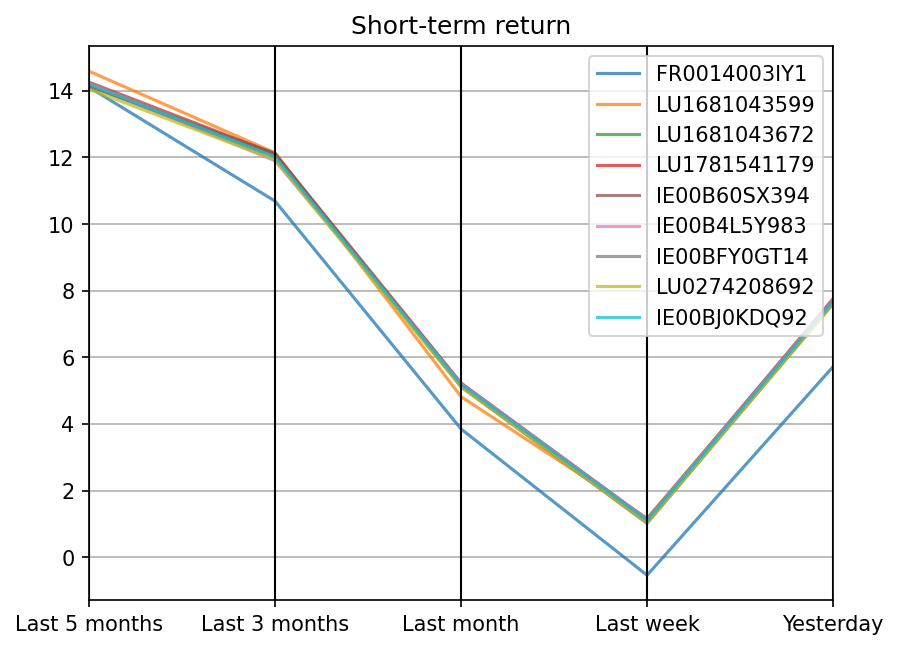

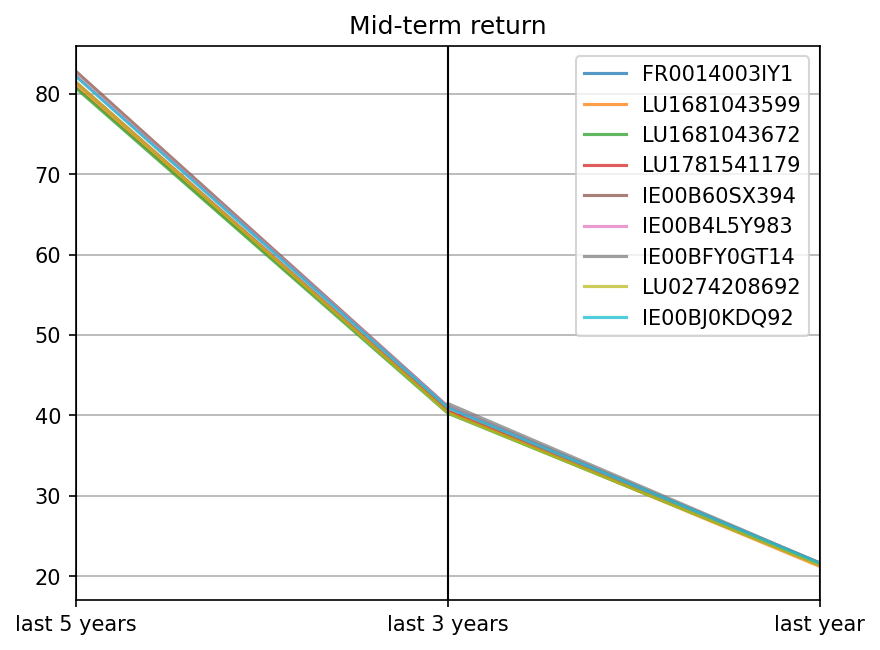

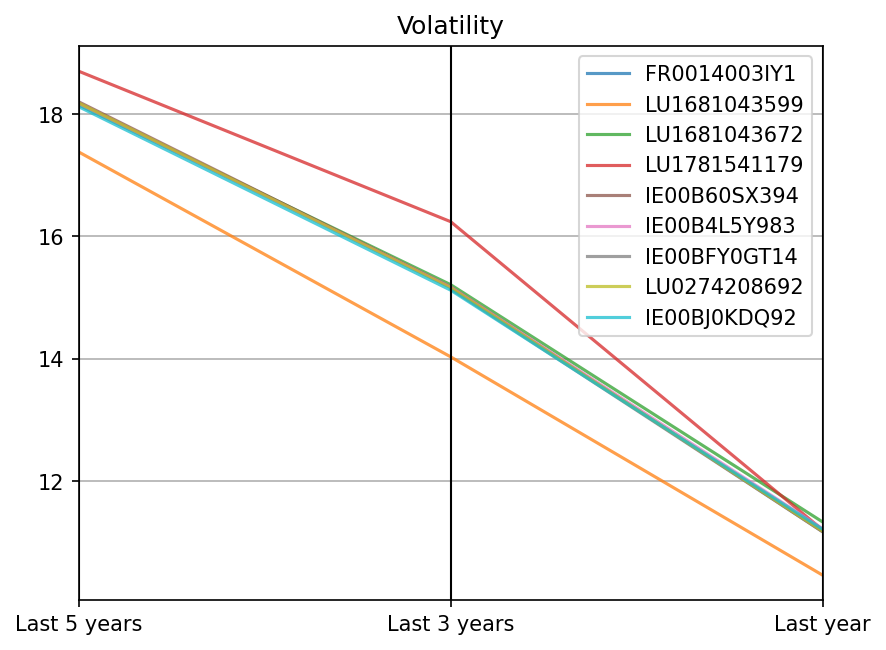

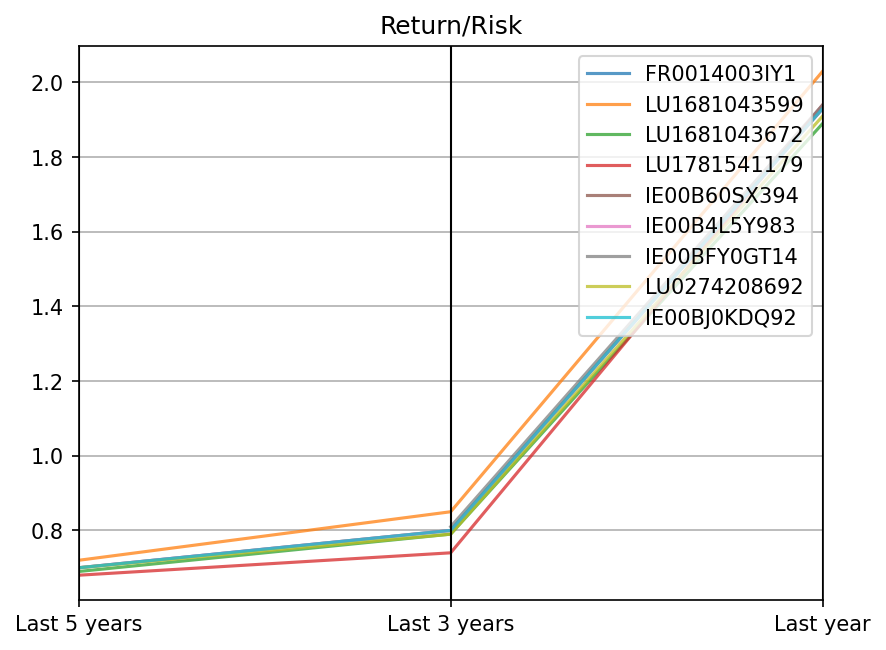

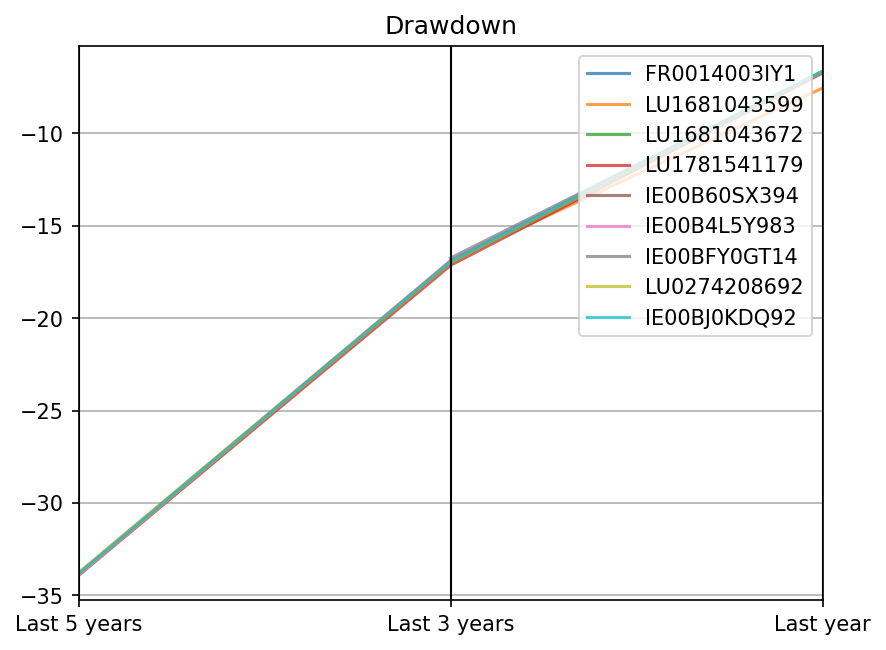

In [18]:
for title, mapping in COLUMNS_MAPPINGS.items():
    df = acc_msci_world_df[mapping.keys()].reset_index().rename(columns=mapping)
    plt.figure(dpi=150)
    ax = pd.plotting.parallel_coordinates(df, "isin", colormap="tab10", alpha=0.75)
    _ = ax.set_title(title)

In [19]:
last_four_years = justetf_scraping.overview.LAST_FOUR_YEARS

In [20]:
df = acc_msci_world_df[list(reversed(last_four_years))]

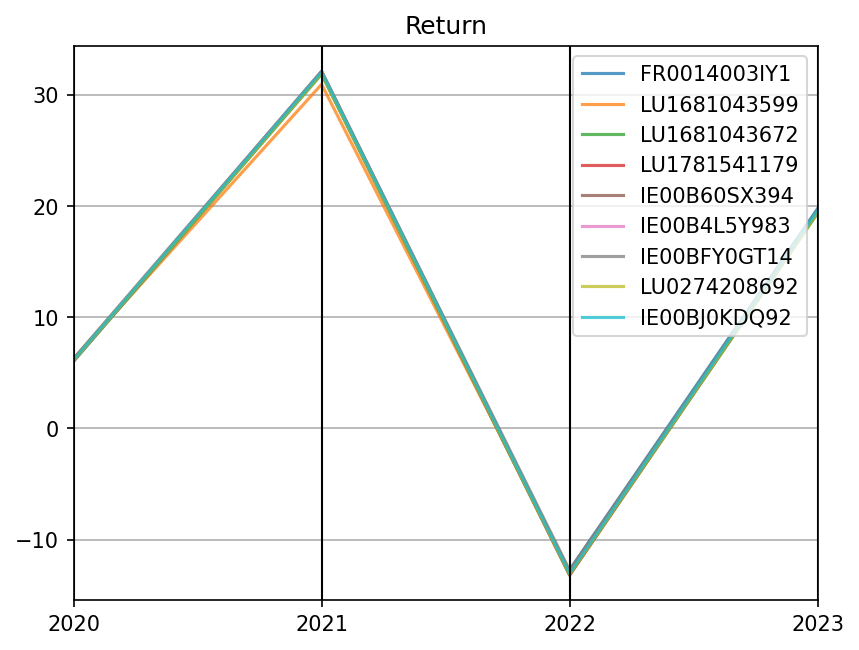

In [21]:
plt.figure(dpi=150)
ax = pd.plotting.parallel_coordinates(
    df.reset_index(), "isin", colormap="tab10", alpha=0.75
)
_ = ax.set_title("Return")

In [22]:
ter = (100 - acc_msci_world_df["ter"]) / 100

In [23]:
df = ((100 + df) / 100).mul(ter, axis=0)

In [24]:
cum_df = df.copy()

In [25]:
df = (df * 100 - 100).reset_index()

In [26]:
cum_df[last_four_years[1]] *= cum_df[last_four_years[0]]
cum_df[last_four_years[2]] *= cum_df[last_four_years[1]]
cum_df[last_four_years[3]] *= cum_df[last_four_years[2]]

In [27]:
cum_df = (cum_df * 100 - 100).reset_index()

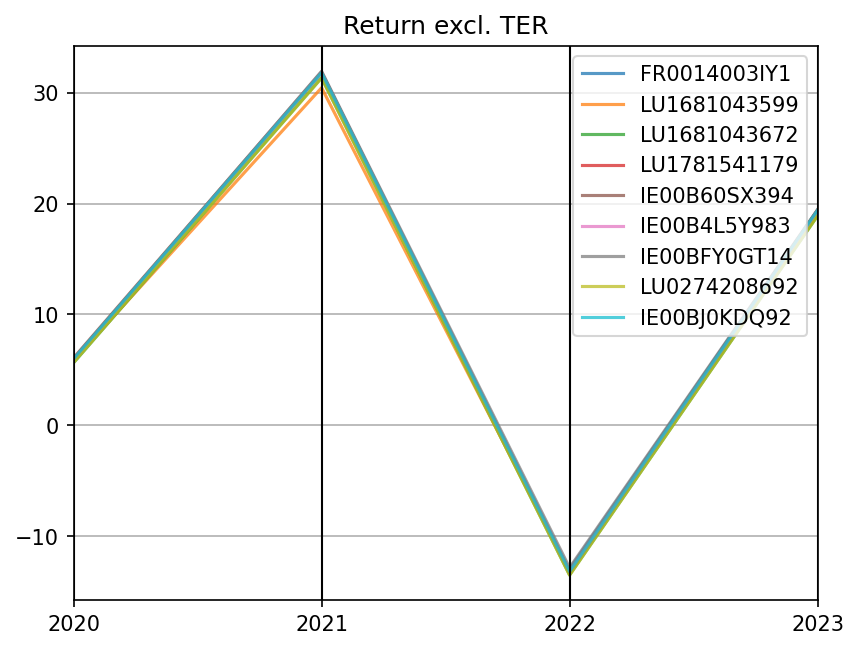

In [28]:
plt.figure(dpi=150)
ax = pd.plotting.parallel_coordinates(df, "isin", colormap="tab10", alpha=0.75)
_ = ax.set_title("Return excl. TER")

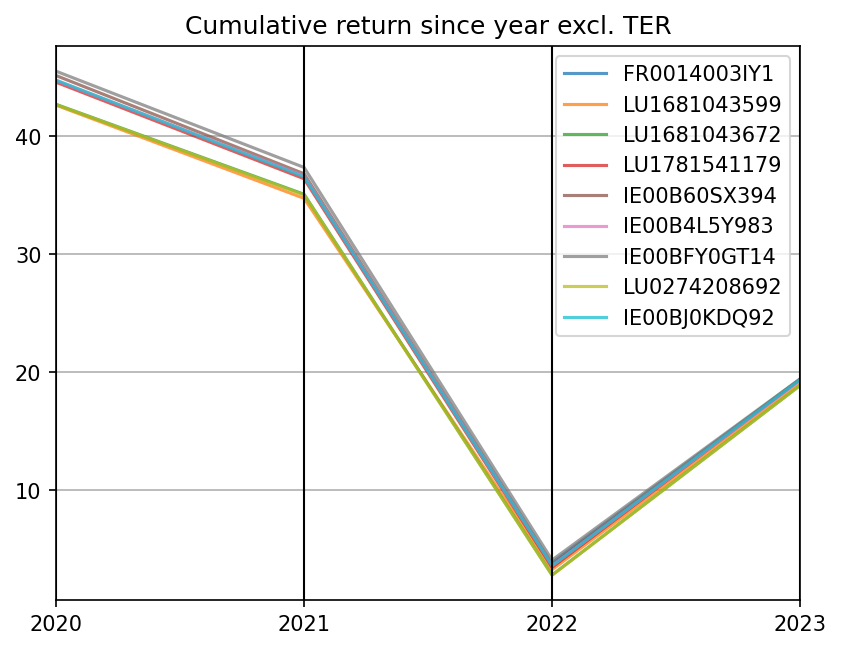

In [29]:
plt.figure(dpi=150)
ax = pd.plotting.parallel_coordinates(cum_df, "isin", colormap="tab10", alpha=0.75)
_ = ax.set_title("Cumulative return since year excl. TER")